In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ADMIN\Videos\FDA\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Some Comment:
+ Tuổi trung bình của khách hàng là 41, nhỏ nhất là 18 tuổi và lớn nhất là 95 tuổi
+ Giá trị trung bình của số dư trung bình hàng năm của khách hàng là 1528 trong khi đó độ lệch chuẩn là 3225  một con số cao để chúng ta có thể hiểu rằng số dư được phân bổ rất nhiều trên tập dữ liệu.
+

### Check giá trị missing value

In [10]:
df.isna().sum().sum()

0

Không có giá trị missing value trong dataset này

### Vẽ Boxplot để xem phân phối và tìm outliers

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

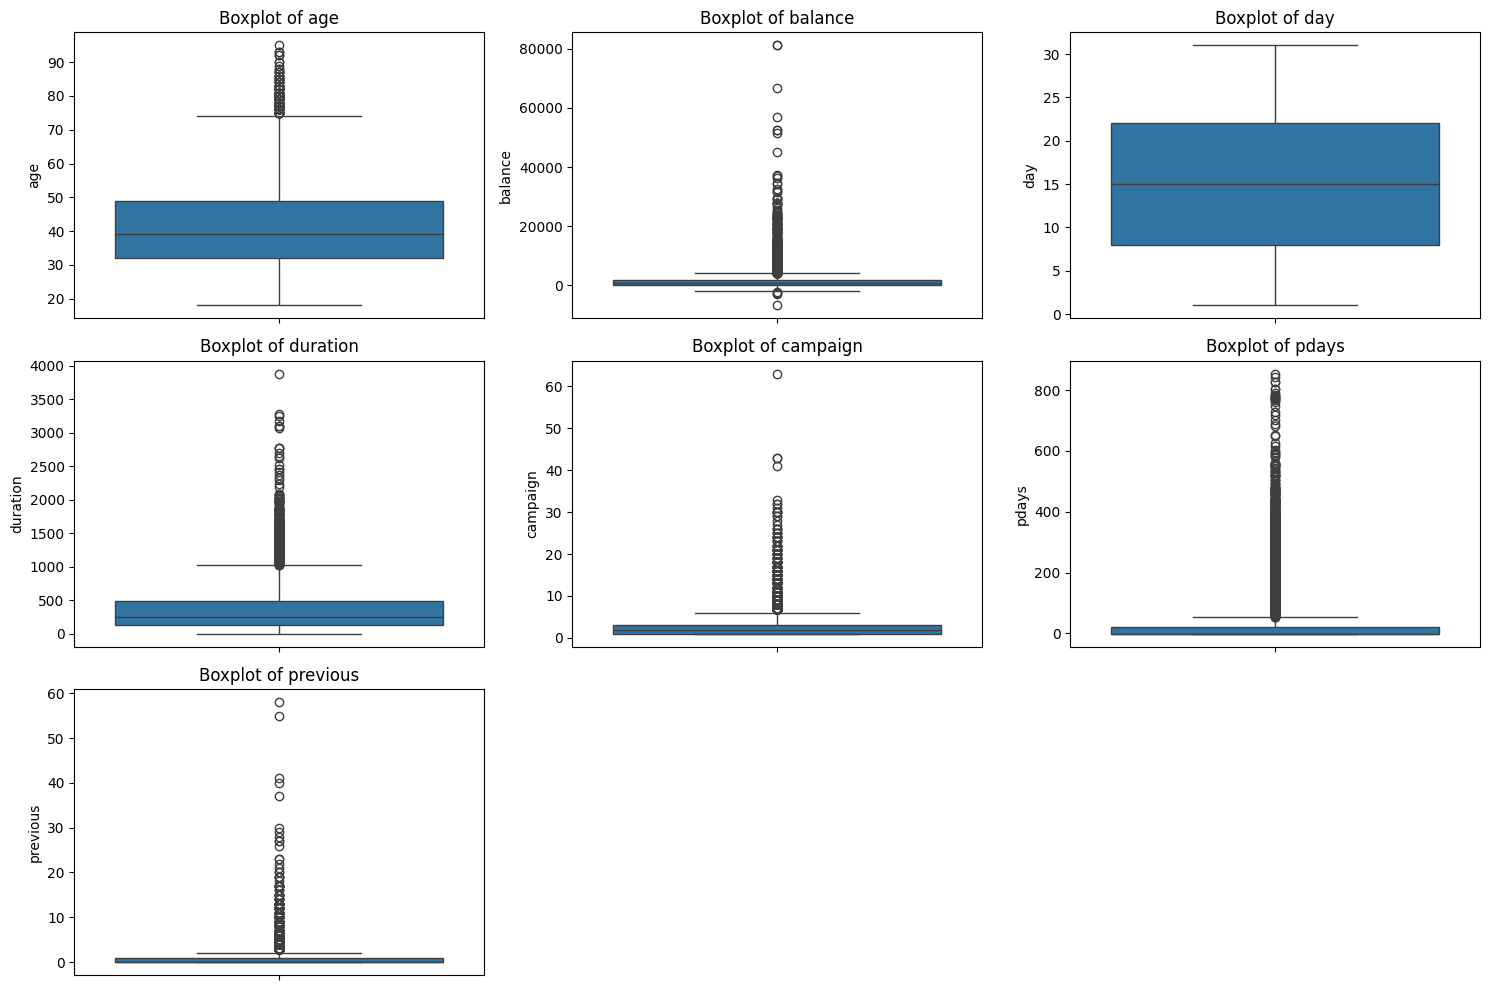

In [12]:
# Lọc ra các cột số để vẽ boxplot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tạo boxplot cho từng cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Chỉnh số hàng và cột dựa vào số cột số
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [16]:
## Drop outliers
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [28]:
## Drop outliers
df['previous'].value_counts().sort_values()

previous
37       1
40       1
41       1
18       1
58       1
28       1
26       1
21       1
22       1
30       1
55       1
29       1
23       2
27       2
20       2
16       2
19       4
15       5
14       6
17      11
13      11
12      16
11      23
10      30
9       34
8       60
7       77
6      117
5      165
4      244
3      435
2      693
1      887
0     8324
Name: count, dtype: int64

In [21]:
df['housing'].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [22]:
df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [26]:
df['duration'].nunique()

1428

#### Phân tích thống kế mô tả

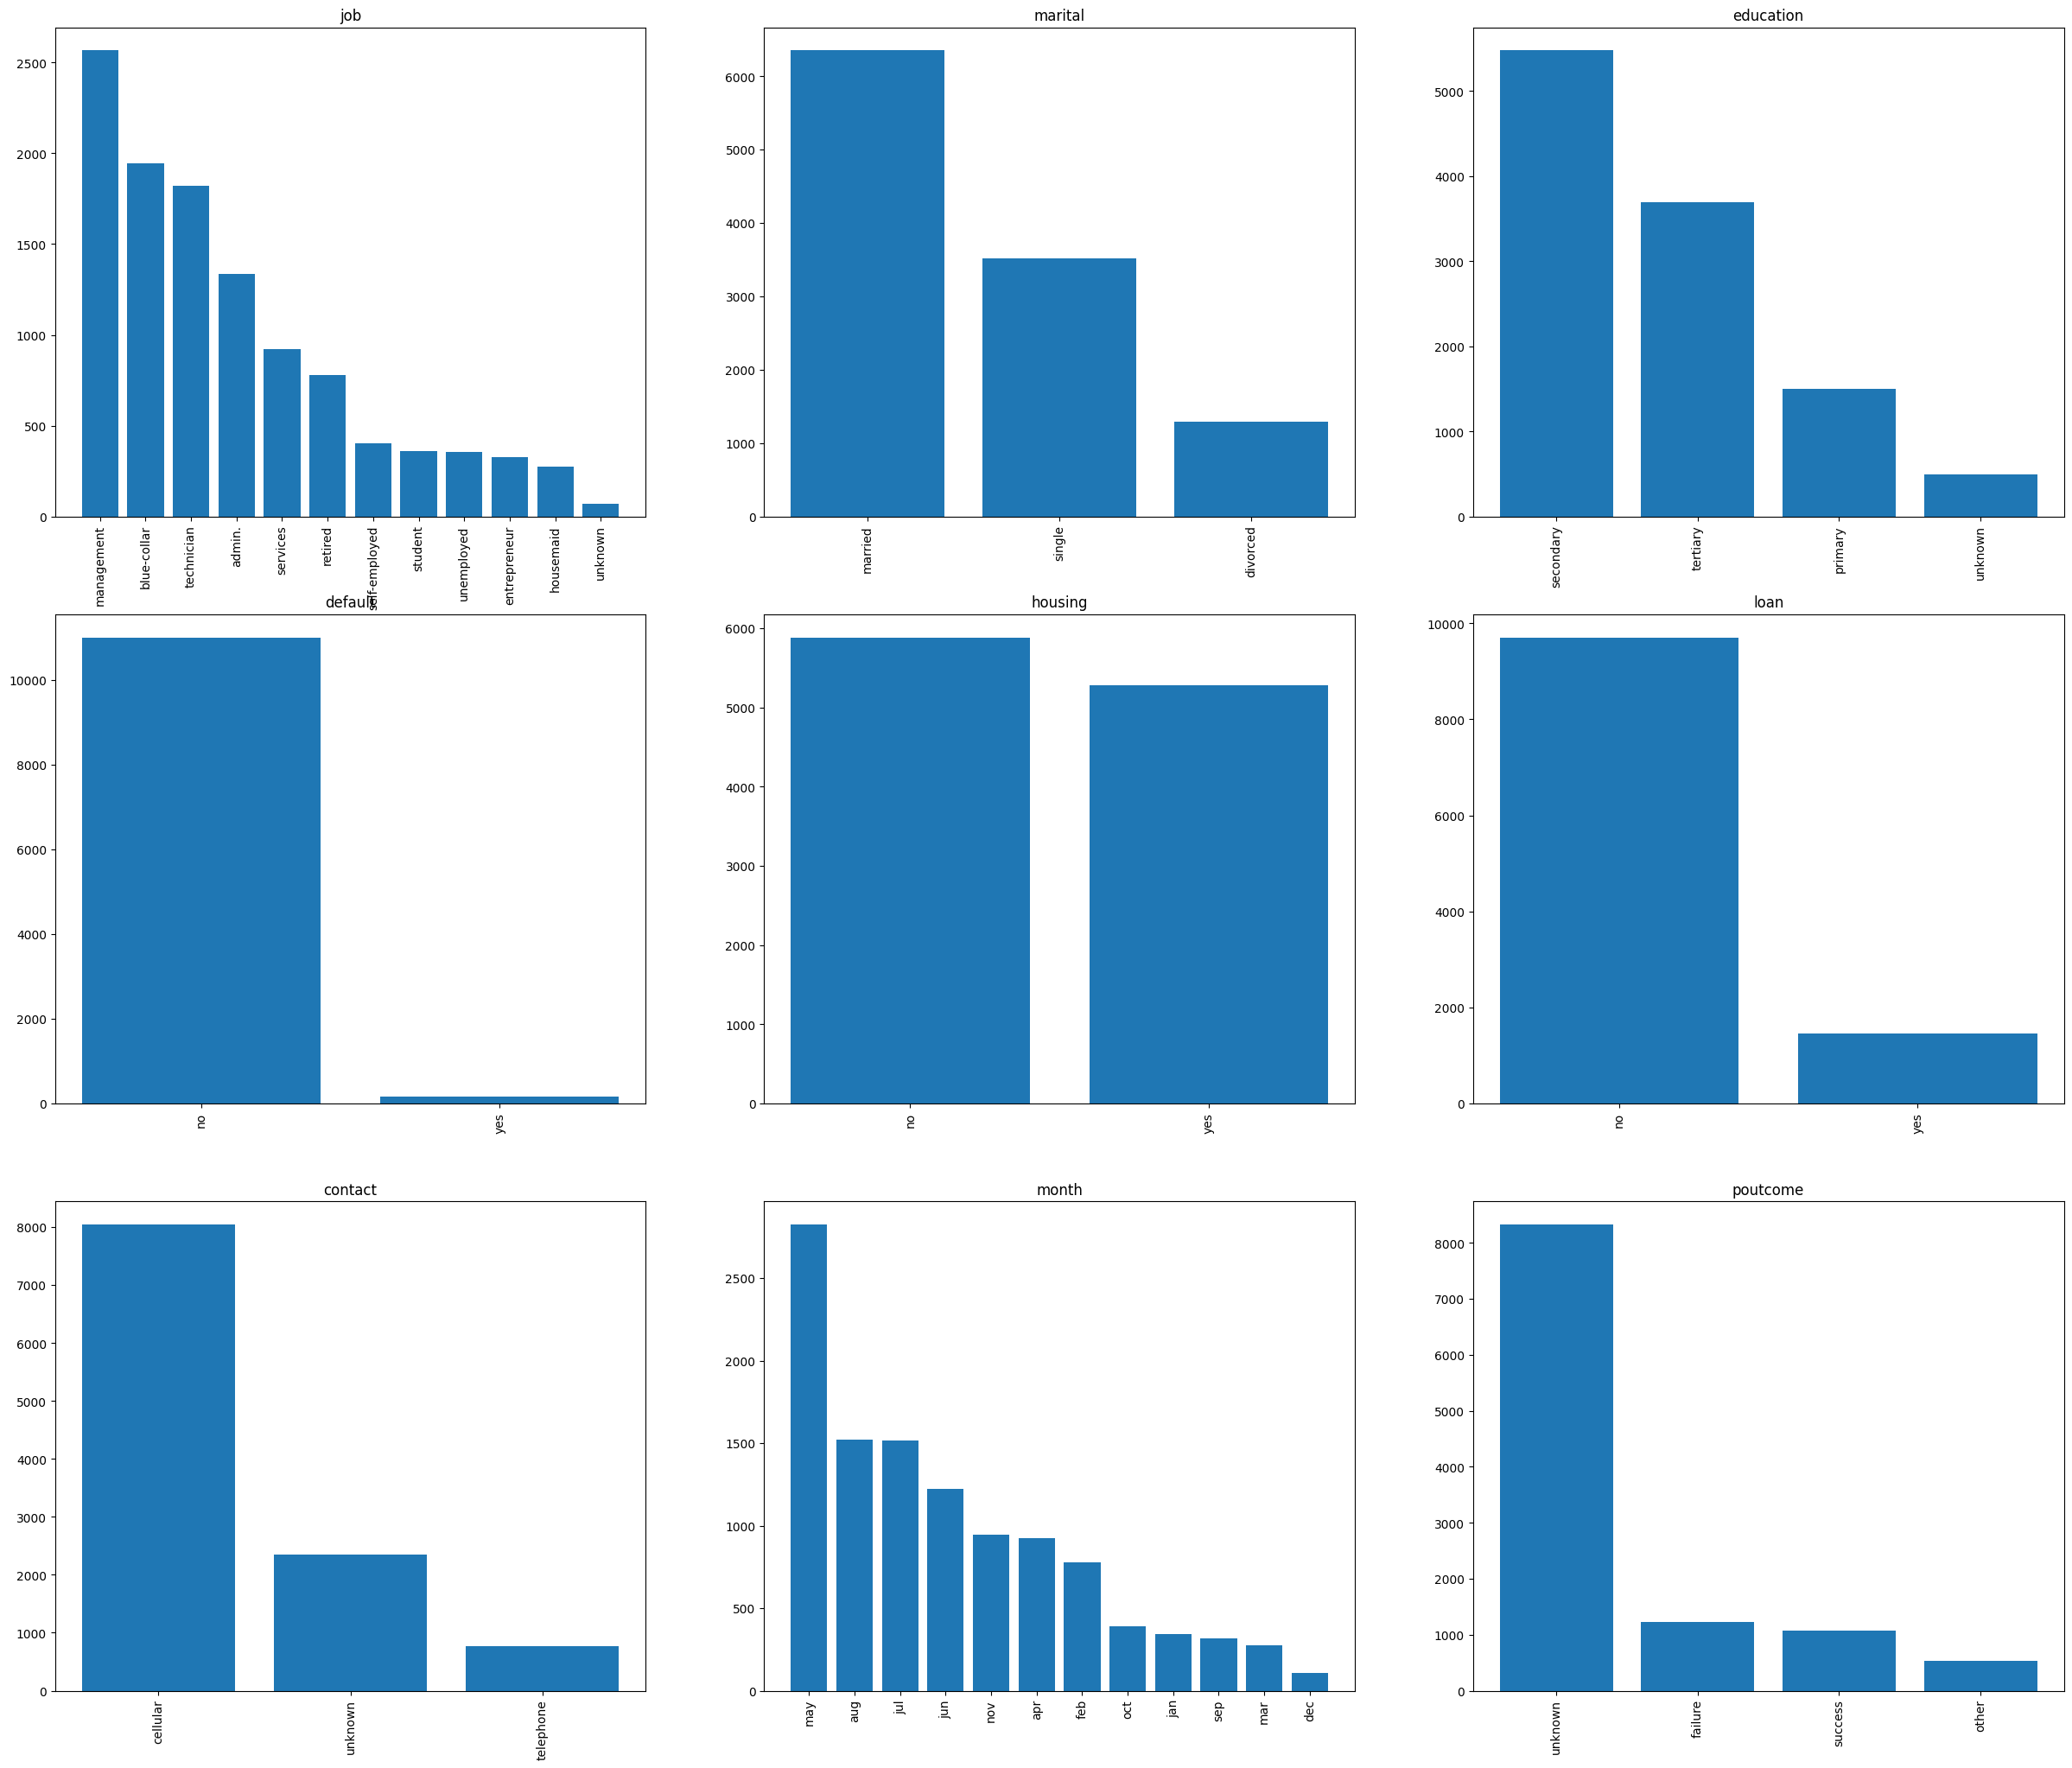

In [14]:
import numpy as np
# Categorical number
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(30, 25))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Insight:
+ Management và Blue-collar Job type Clients được nhận đến nhiều cuộc gọi nhất
+ Số khách hàng Married và Single chiếm tỷ lệ nhiều hơn so với divorced
+ Hầu hết education của customers đều là trung cấp, đại học và sau đại học, số lượng khách hàng trình độ học vấn cơ bản rất ít
+ Hầu hết tất cả khách hàng không có nợ quá hạn trong tín dụng
+ Khách hàng có khoản vay mua nhà và không có khoản vay mua nhà tương đương nhau
+ 86.7% khách hàng không có khoản vay cá nhân
+ Hầu hết các khách hàng đều được liên hệ thông qua máy bàn 
+ Hầu hết các khách hàng trong ngân hàng được liên hệ vào các tháng 5, 7 và 8.
rất ít khách hàng được liên hệ vào các tháng 9, 3 và 12
+ Từ Phân tích, Chiến dịch tiếp thị trước đó sẽ có nhiều Thất bại hơn Thành công hầu như là unknown

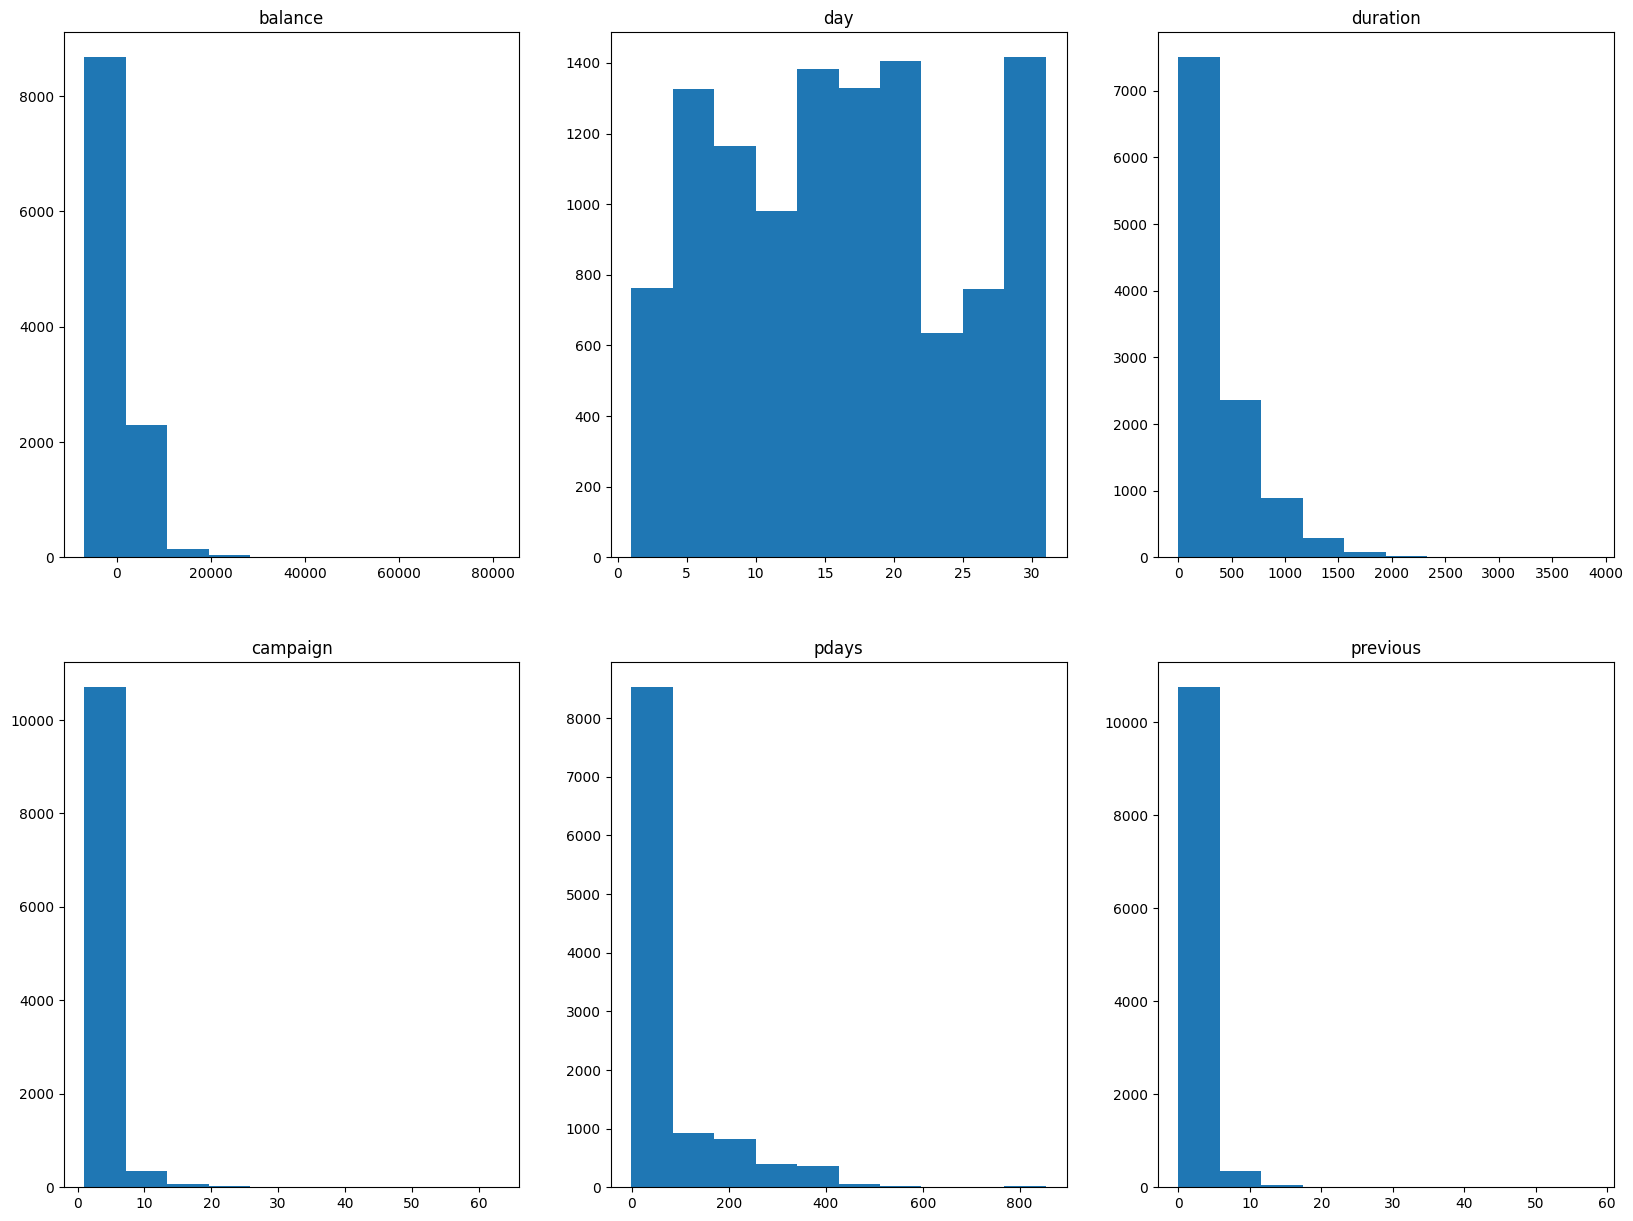

In [15]:
# Numeric
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

+ Số dư trung bình hàng năm của khách hàng chủ yếu là 0
+ Ngày liên hệ cuối cùng trong tháng chủ yếu là ngày 30 và 14-23: ngày giữa tháng
+ Thời gian của lần liên hệ cuối cùng chủ yếu từ 0 - 500 giấy
+ Số lần liên hệ cho khách hàng trong chiến dịch này thuộc khoảng 0 - 8
+ Số ngày kể từ lần cuối mà liên hệ cho khách hàng ( chiến dịch trước đó): đa số là 0 - 60 ngày
+ Ngân hàng đã thực hiện tầm 0 - 8 liên hệ cho khách hàng ở chiến dịch trước

Ta có thể thấp cái giá trị ở cột pday, previous,poutcome tồn tại nhiều outliers => Check

In [16]:
df[['pdays', 'campaign', 'previous']].describe()


,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


In [17]:
#pdays
len(df[df['pdays'] >  400 ]) /len(df) * 100

1.2005017022039062

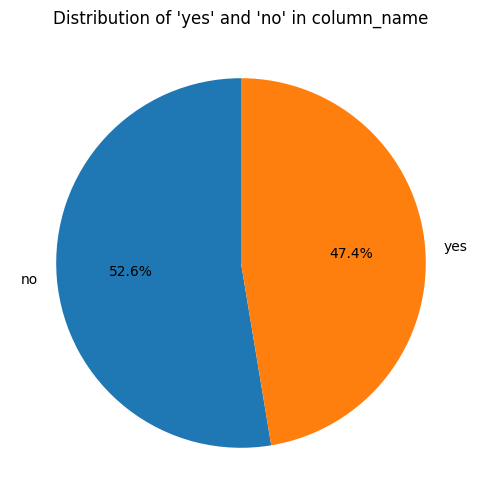

In [18]:
value_counts = df['deposit'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of 'yes' and 'no' in column_name")
plt.show()

+ dường như kết quả của chiến dịch mới này vẫn không khả quan hơn khi tỷ lệ khách hàng từ chối vẫn nhiều hơn khách hàng đồng ý
+ nhưng mà hai tỷ lệ này không chênh lệch quá lớn

# EDA

### Phân tích đơn biến

#### Categorical Number

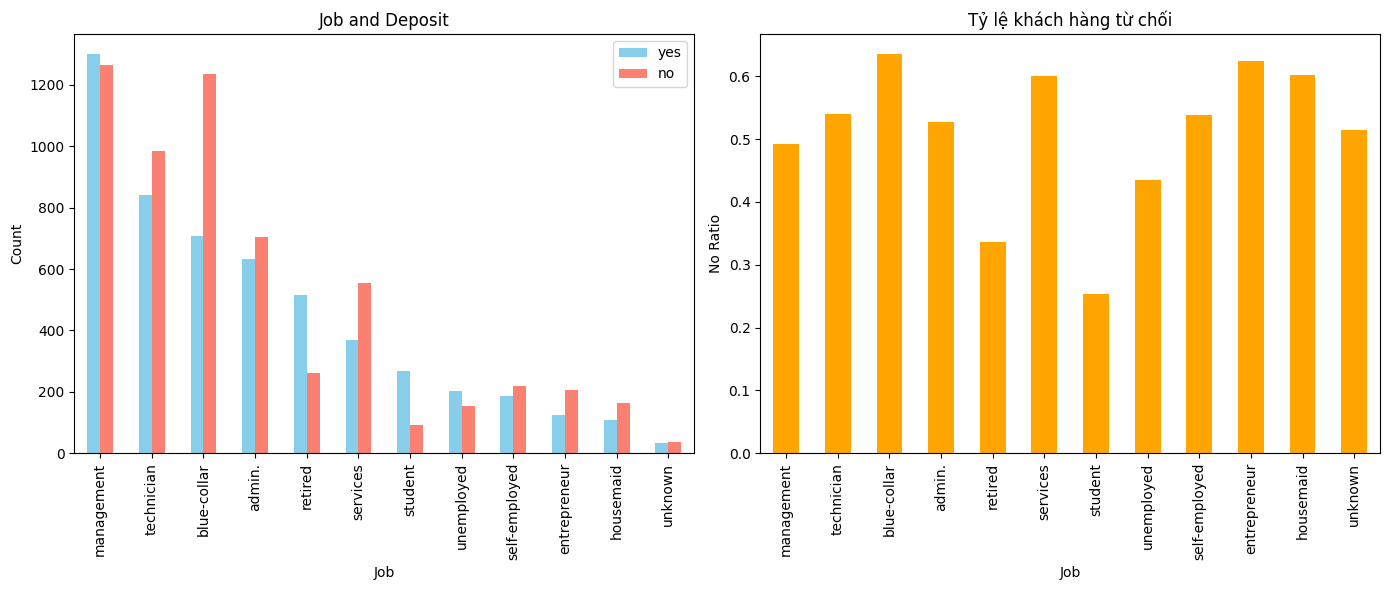

In [19]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Job and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Job')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Job')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Các khách hàng : blue-collar, entrepreneur, services, housemaid có tỷ lệ từ chối cao hơn nhiều so với các nhóm còn lại
+ Student và retired là 2 nhóm có tỷ lệ đăng kí term-deposit cao hơn những nhóm còn lại
+ Số lượng khashc hàng là management và techinician đăng kí gửi tiền nhiều nhất

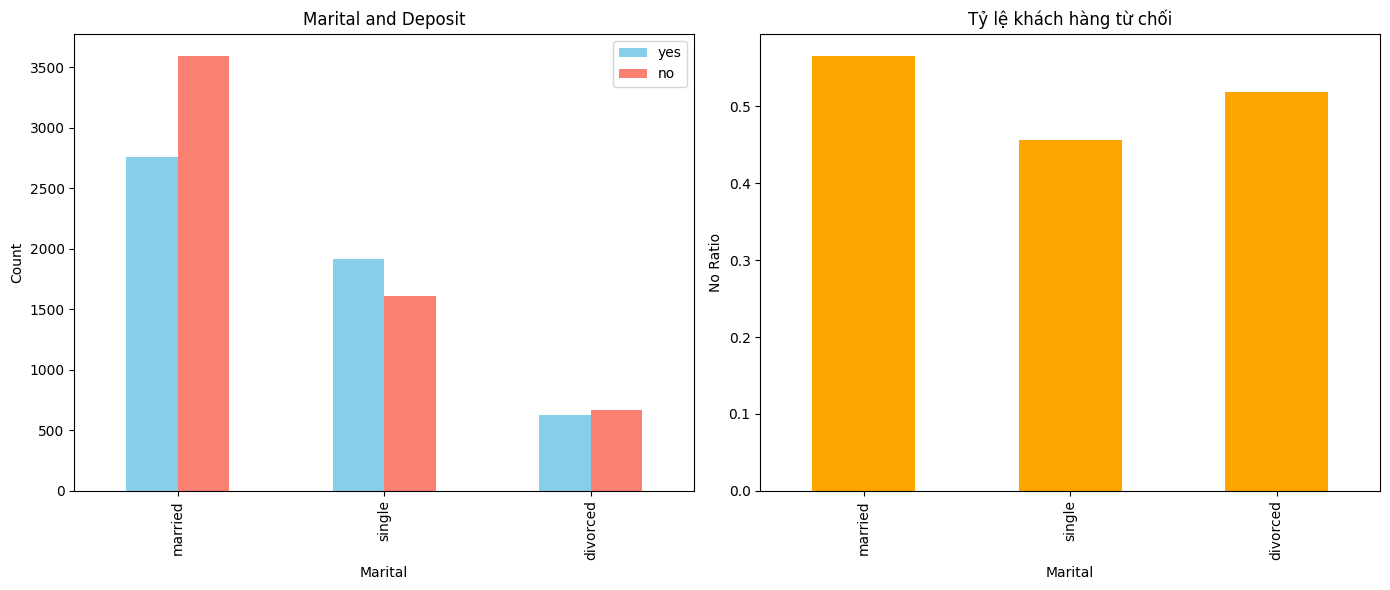

In [20]:
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Marital and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Marital')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Marital')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Mặc dù về mặt tuyệt đối, người tiêu dùng đã kết hôn thường đồng ý sử dụng dịch vụ nhiều hơn, nhưng về mặt tương đối, người độc thân phản hồi tốt hơn.

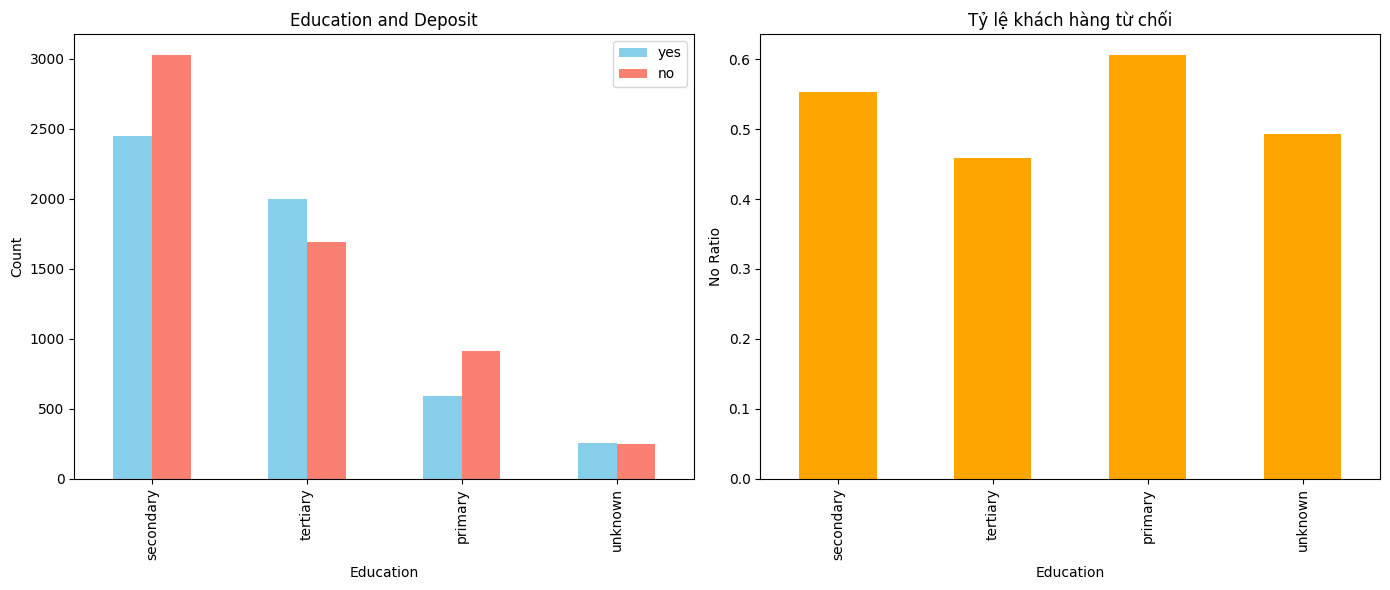

In [21]:
### Education
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Education and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Tỷ lệ khách hàng từ chối  ở primary cao nhất 

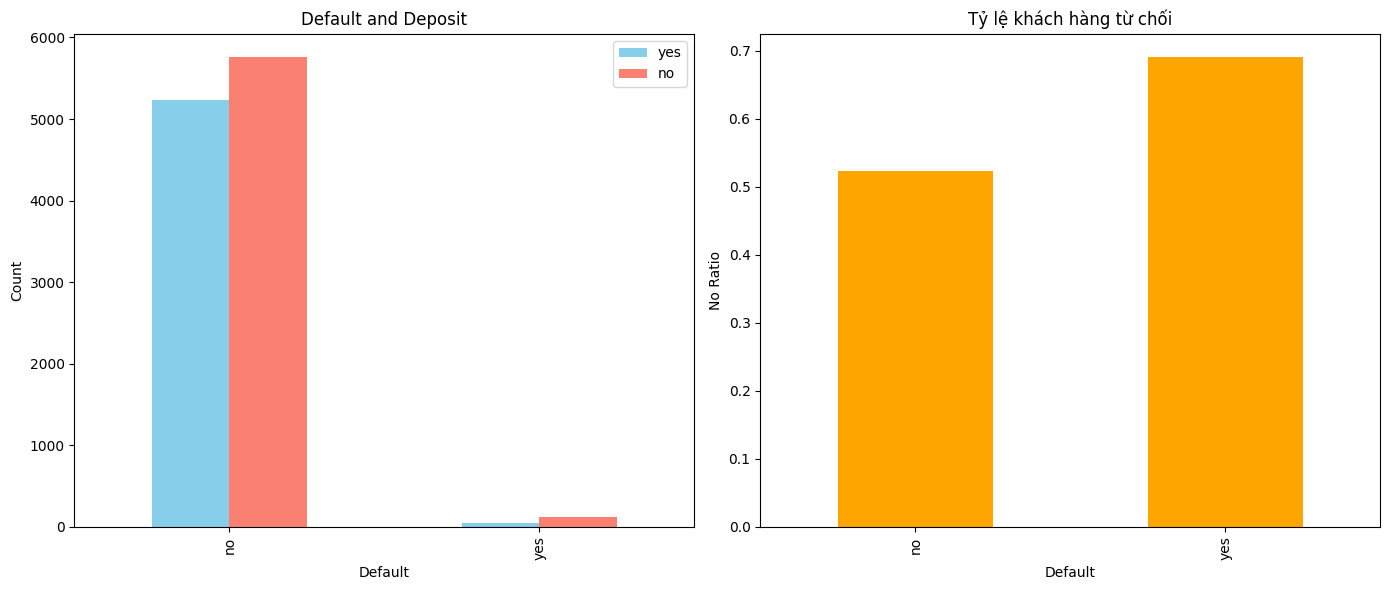

In [22]:
### Education
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['default'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['default'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Default and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Khách hàng có nợ tín dụng quá hạn thì có xu hướng từ chối gửi term deposit

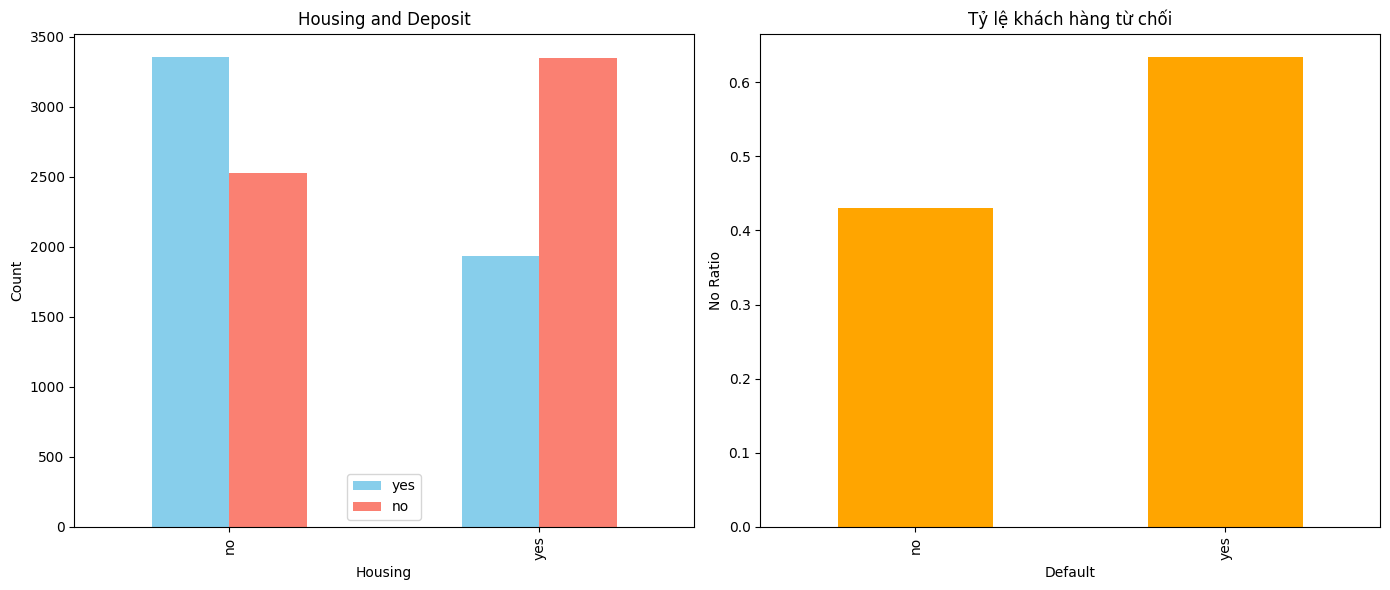

In [23]:
## housing & deposit
### Education
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['housing'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['housing'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Housing and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Housing')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Những người có sở hữu nhà có xu hướng từ chối nhiều hơn

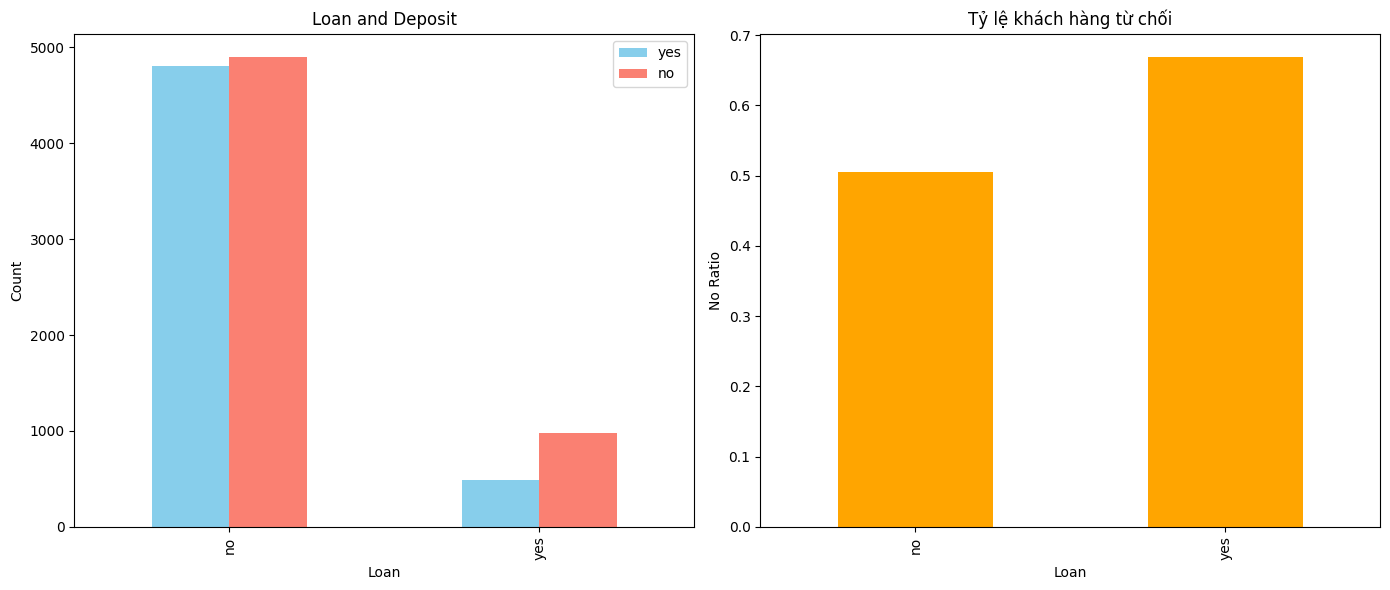

In [24]:
# Loan Distribution

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['loan'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['loan'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Loan and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Loan')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Loan')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


Sự khác biệt rõ ràng giữa những người tiêu dùng đã sử dụng dịch vụ của ngân hàng và đã nhận được khoản vay.
Có khoản vay => từ chối

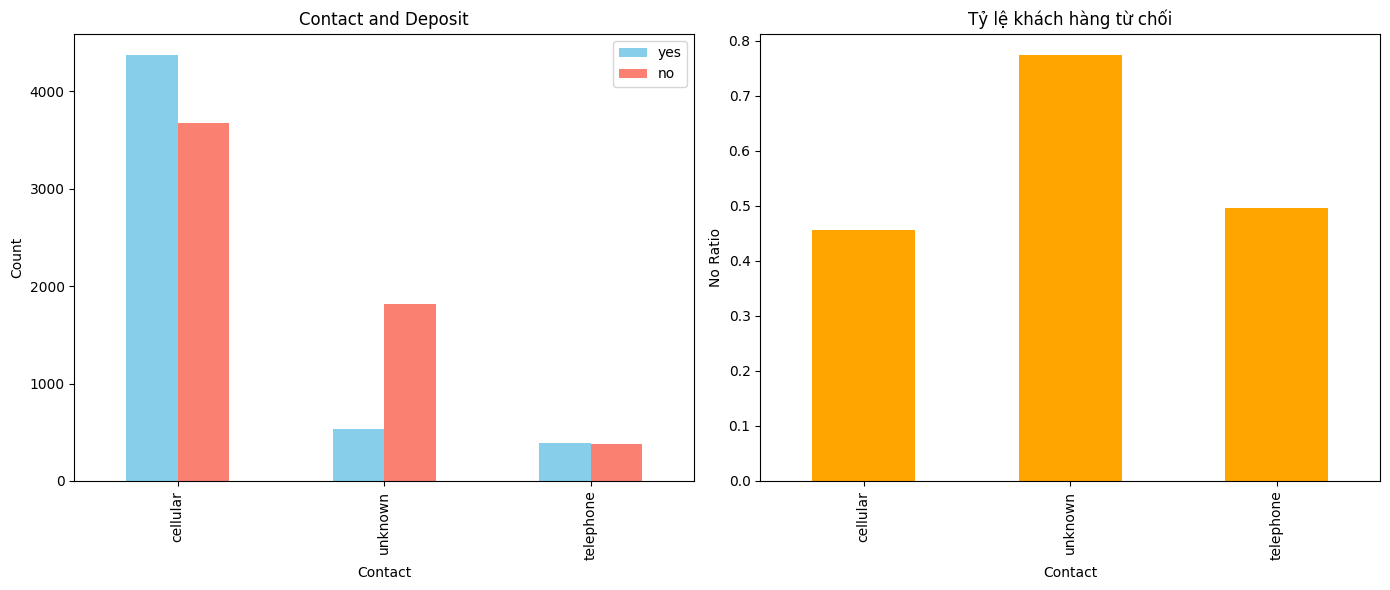

In [25]:

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Contact and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Contact')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Contact')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Nhìn chung có thể thấy tỷ lệ KH đồng ý và không đồng ý không quá chệnh lệch nhau, cellular có thấp hơn telephone 1 ít

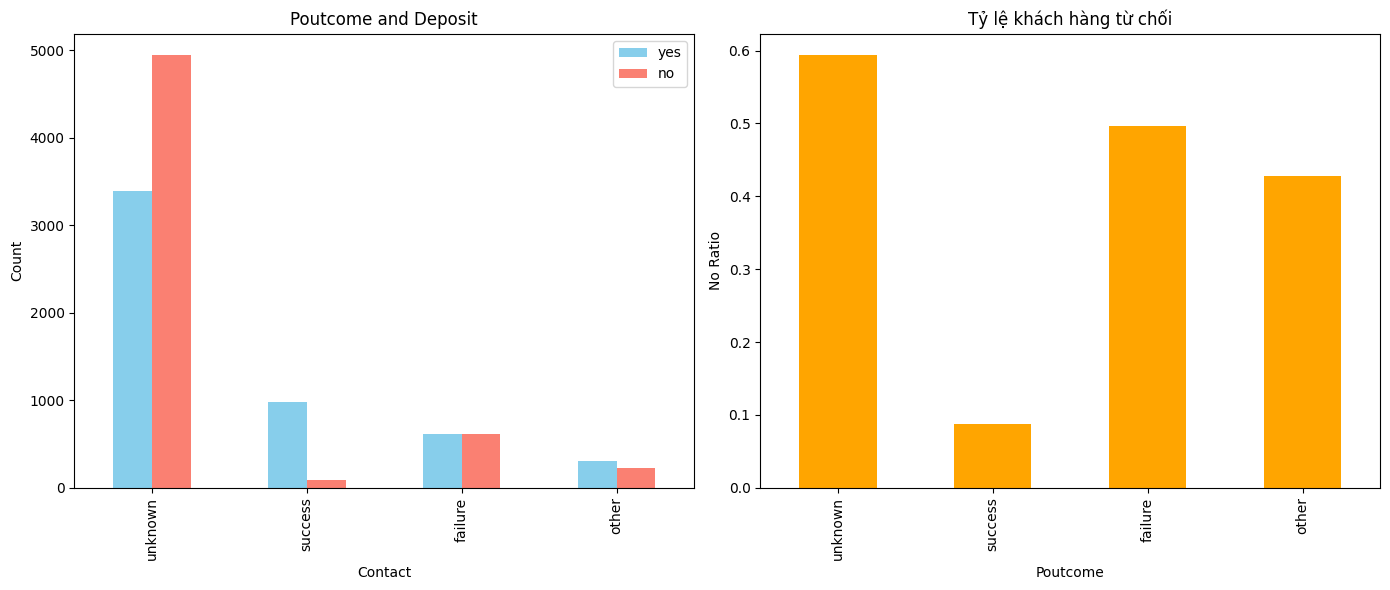

In [26]:

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['poutcome'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['poutcome'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Poutcome and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Contact')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Poutcome')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


+ Có vẻ như kết quả của chiến dịch trước có ảnh hưởng tới kết quả lần nãy. Khách hàng đã đồng ý ở lần trước có xu hướng đồng ý ở lần tiếp theo
+ Và công ty cũng chưa đưa ra những chiến dịch mới để tiếp cận, thuyết phục được những khách hàng chưa đồng ý

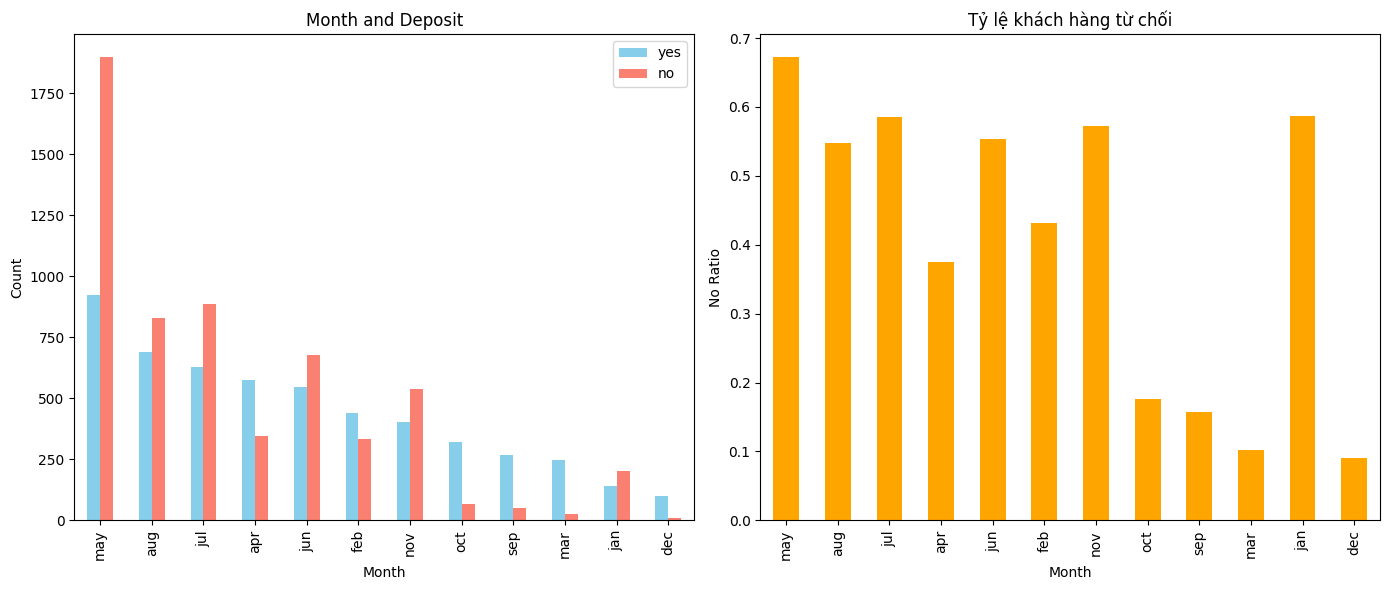

In [69]:
## Marital và Deposit
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['month'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['month'].value_counts()

j_df['no_ratio'] = j_df['no'] / (j_df['yes'] + j_df['no'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số lượng khách hàng 'yes' và 'no' theo công việc
j_df[['yes', 'no']].plot.bar(ax=axes[0], title='Month and Deposit', color=['skyblue', 'salmon'])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Tỷ lệ khách hàng 'no' theo công việc
j_df['no_ratio'].plot.bar(ax=axes[1], title='Tỷ lệ khách hàng từ chối', color='orange')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('No Ratio')

# Hiển thị hai biểu đồ cạnh nhau
plt.tight_layout()
plt.show()


Hầu hết khách hàng được liên hệ vào mùa hè (tháng 5-tháng 7)
Tháng 11 và tháng 10 khá yên tĩnh cho đến tháng 11 khi nó đạt đỉnh trở lại trước Giáng sinh và tháng 1-tháng 2, không có bất kỳ quan sát nào.
+ Vào tháng 5 khách hàng từ chối rất cao có lên đến gần 0.7%
+ Tháng 12 sẽ có lượng khách hàng rời bỏ ít nhât

rất ít khách hàng được liên hệ vào các tháng 9, 3 và 12. Thậm chí ít liên hệ được thực hiện vào những tháng này, nhiều khách hàng đăng ký gửi tiền có kỳ hạn hơn vào những tháng này. Tốt hơn là nên liên hệ với khách hàng nhiều hơn vào những tháng này.

#### Numerical

In [27]:
df['deposit'].value_counts()


deposit
no     5873
yes    5289
Name: count, dtype: int64

In [28]:
# Mã hóa cột deposit: 'y' thành 1 và 'no' thành 0
df['label'] = df['deposit'].map({'yes': 1, 'no': 0})


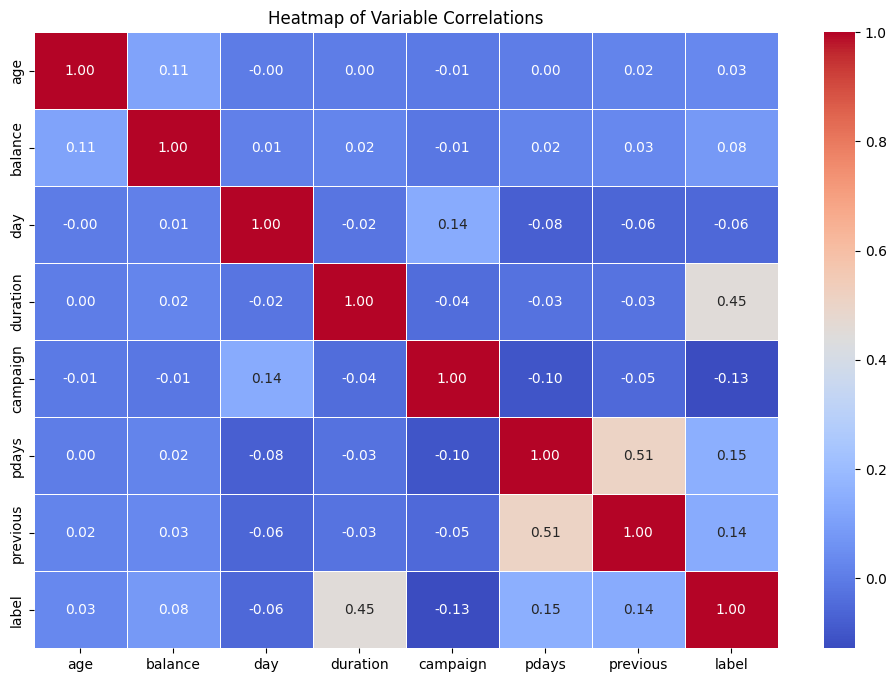

In [29]:
### Correlation


# Chỉ chọn các cột dạng số để tính toán ma trận tương quan
numeric_df = df.select_dtypes(include=['int64'])

# Tính toán ma trận tương quan trên dữ liệu số
correlation_matrix = numeric_df.corr()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ heatmap của ma trận tương quan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Thêm tiêu đề
plt.title('Heatmap of Variable Correlations')
plt.show()



Cột day, balance,age có vẻ có corr ít nhất với deposit
Cột duration có mối tương quan cao nhất

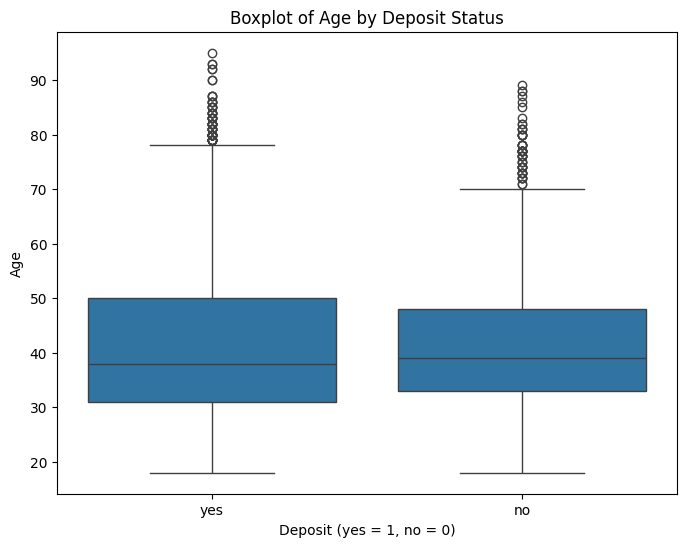

In [30]:
# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='age', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Age by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Age')
plt.show()


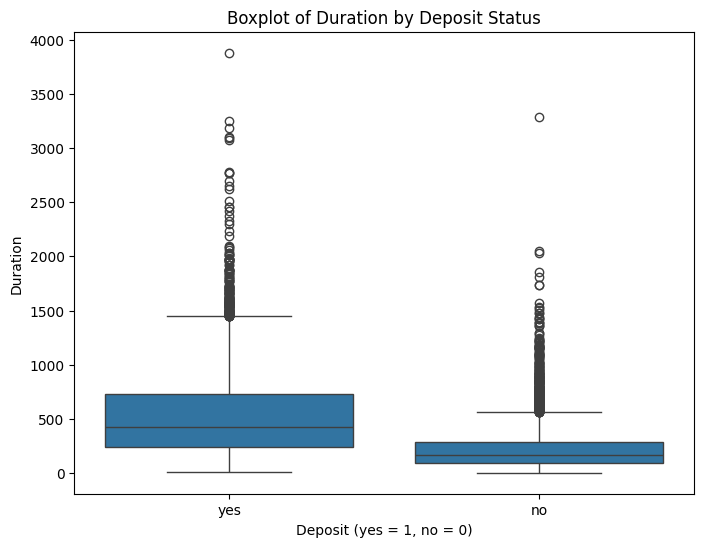

In [31]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='duration', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Duration by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Duration')
plt.show()


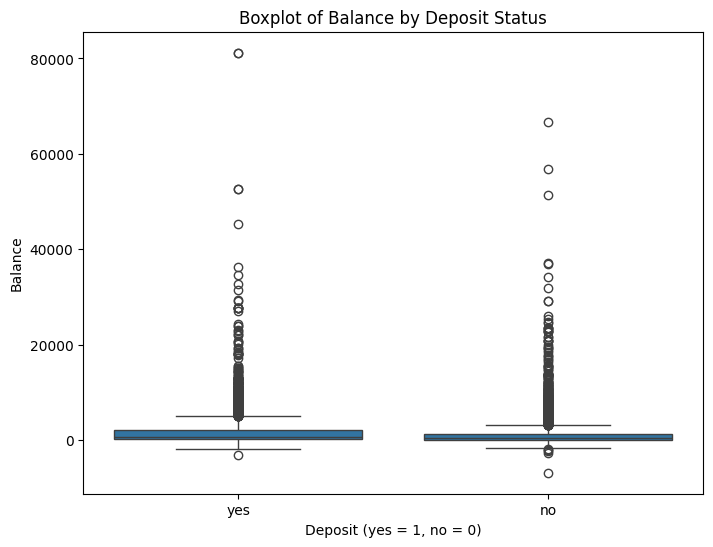

In [32]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Balance by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Balance')
plt.show()


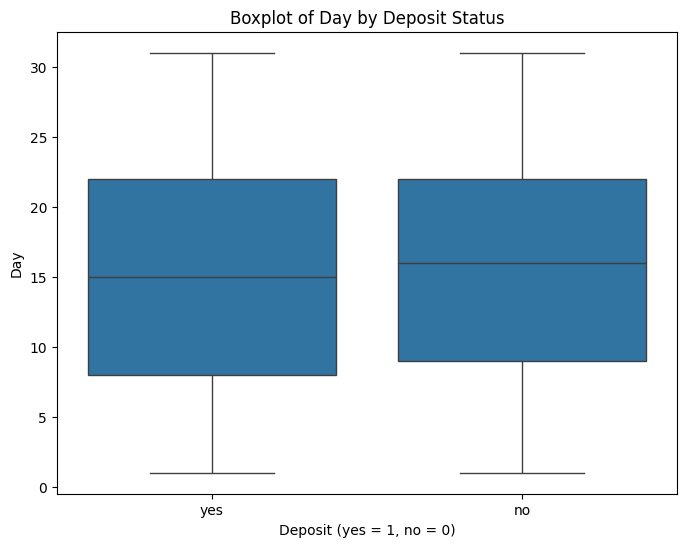

In [33]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='day', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Day by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Day')
plt.show()


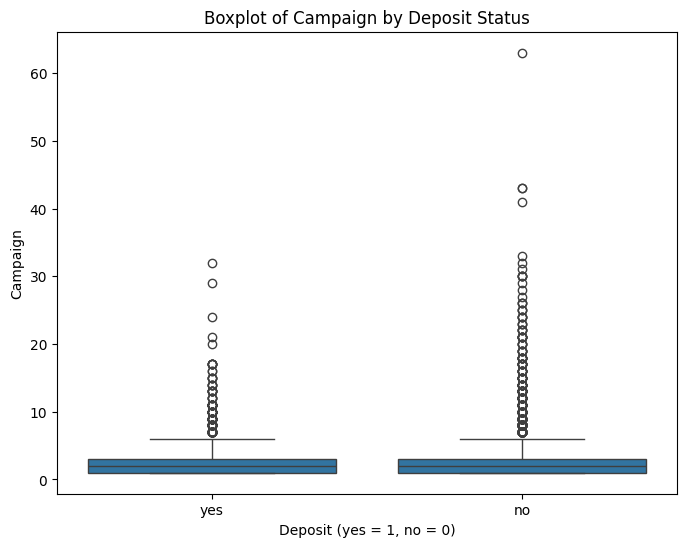

In [34]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='campaign', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Campaign by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('Campaign')
plt.show()


In [ ]:
 với sự gia tăng số lượng liên hệ được thực hiện cho khách hàng trong chiến dịch, khách hàng sẽ có nhiều cơ hội hủy đăng ký gửi tiền có kỳ hạn hơn. Tốt hơn là nên thực hiện ít liên hệ hơn với khách hàng để khiến họ đăng ký gửi tiền có kỳ hạn

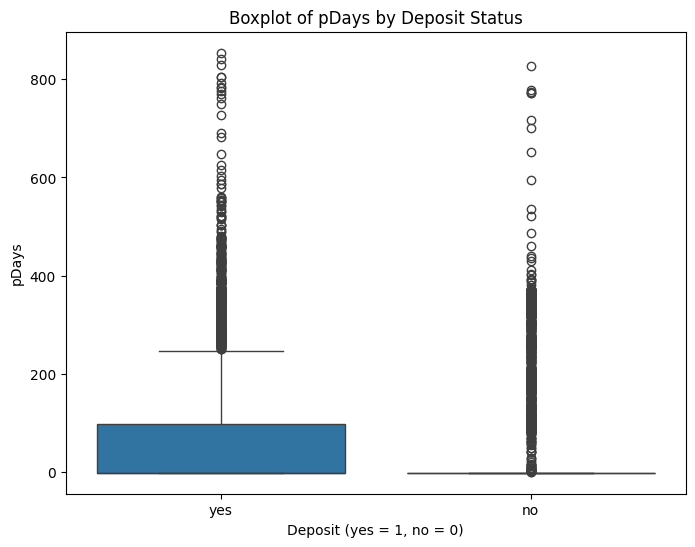

In [35]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='pdays', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of pDays by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('pDays')
plt.show()


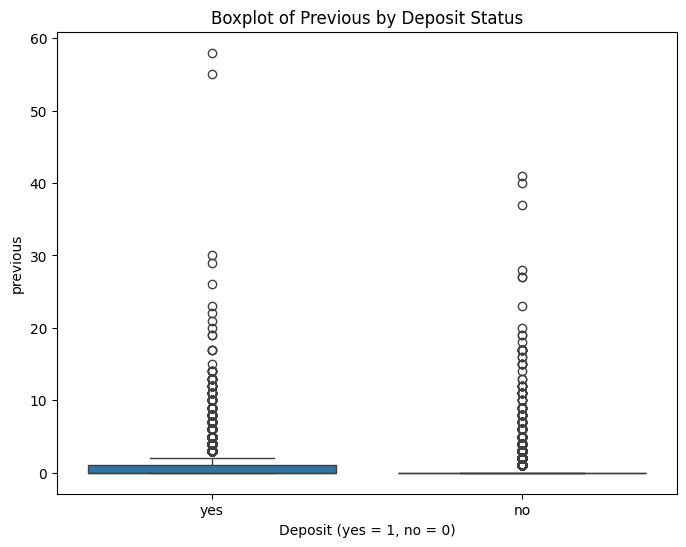

In [36]:

# Vẽ boxplot giữa tuổi và deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='previous', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot of Previous by Deposit Status')
plt.xlabel('Deposit (yes = 1, no = 0)')
plt.ylabel('previous')
plt.show()


+ Tạm thời có thể phân loại thành 2 nhóm
     + Feature có ảnh hưởng đến Target: previous (số lần liên hệ cho khách hàng trước chiến dịch này), pdays(số ngày kể từ lần cuối khách hàng được liên hệ từ 1 chiến dịch trước đó), duration(thời gian của lần liên hệ cuối cùng)
     + Feature không gây ảnh hưởng nhiều đến target: campaign(số lần liên hệ cho khách hàng cho chiến dịch này), day(ngày liên hệ cuối cùng trong tháng), age( tuổi),balance( số dư trung bình hàng năm)

### Dates

## Phân tích Đa biến kết hợp

##### According to Occupation (Job)

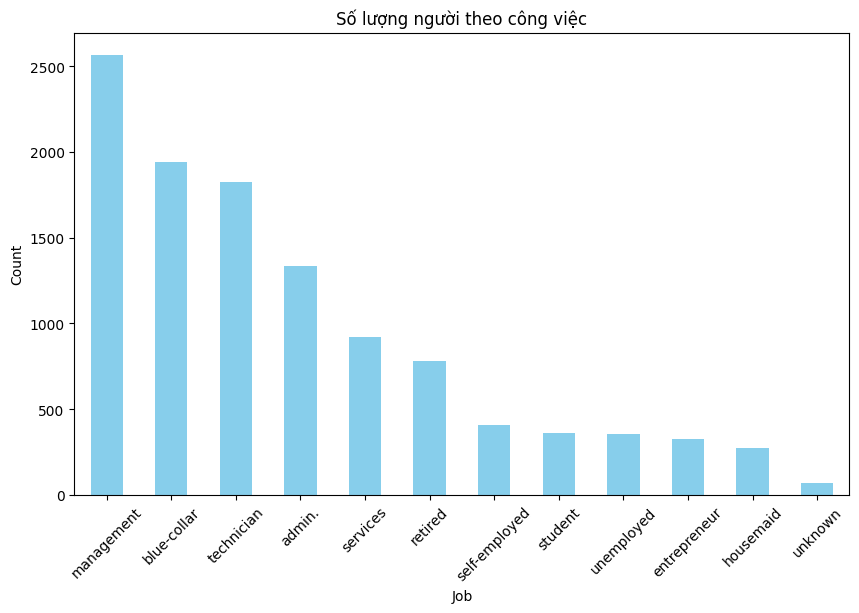

In [37]:
import matplotlib.pyplot as plt

job_counts = df['job'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')

plt.title('Số lượng người theo công việc')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Xoay nhãn để dễ đọc hơn
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\1777345115.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




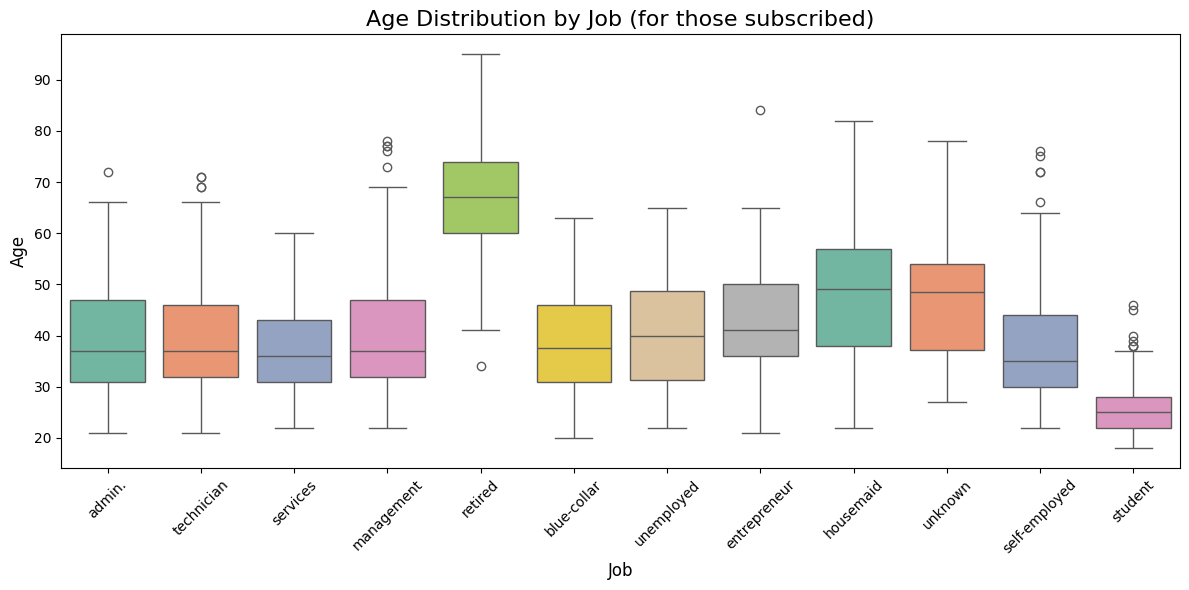

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu của bạn
suscribed_df = df.loc[df["deposit"] == "yes"]  # Chỉ lọc những người đã đăng ký

# Vẽ biểu đồ phân phối
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='age', data=suscribed_df, palette="Set2")

# Tùy chỉnh biểu đồ
plt.title('Age Distribution by Job (for those subscribed)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Những người đã nghỉ hưu là những người có độ tuổi trung bình cao nhất trong khi sinh viên là những người có độ tuổi trung bình thấp nhất.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\1388566811.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




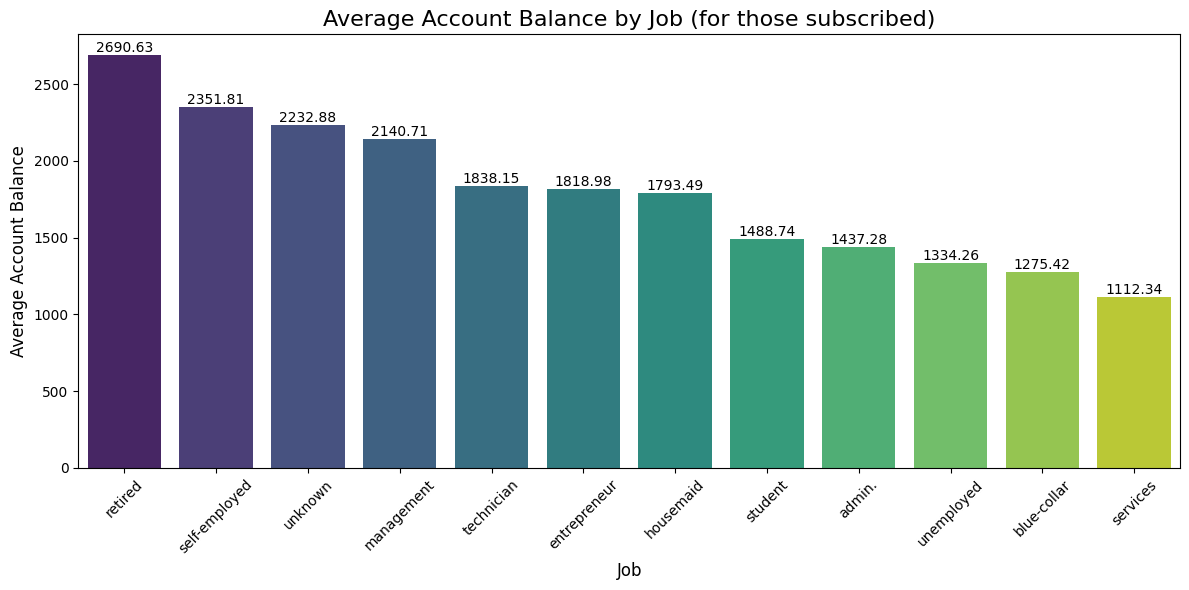

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu của bạn
suscribed_df = df.loc[df["deposit"] == "yes"]  # Chỉ lọc những người đã đăng ký

# Tính toán số dư tài khoản trung bình theo nghề nghiệp và sắp xếp từ lớn đến bé
avg_balance_by_job = suscribed_df.groupby('job')['balance'].mean().reset_index()
avg_balance_by_job = avg_balance_by_job.sort_values(by='balance', ascending=False)  # Sắp xếp theo balance từ lớn đến bé

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='job', y='balance', data=avg_balance_by_job, palette="viridis")

# Thêm số vào trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format số với 2 chữ số sau dấu phẩy
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí số
                ha='center', va='center',  # Căn giữa
                fontsize=10, color='black',  # Cài đặt font chữ
                xytext=(0, 5), textcoords='offset points')  # Điều chỉnh vị trí của số

# Tùy chỉnh biểu đồ
plt.title('Average Account Balance by Job (for those subscribed)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Average Account Balance', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


+  retired, self_employed, management là những đối tượng có số dư tài khoản cao hơn so với clai

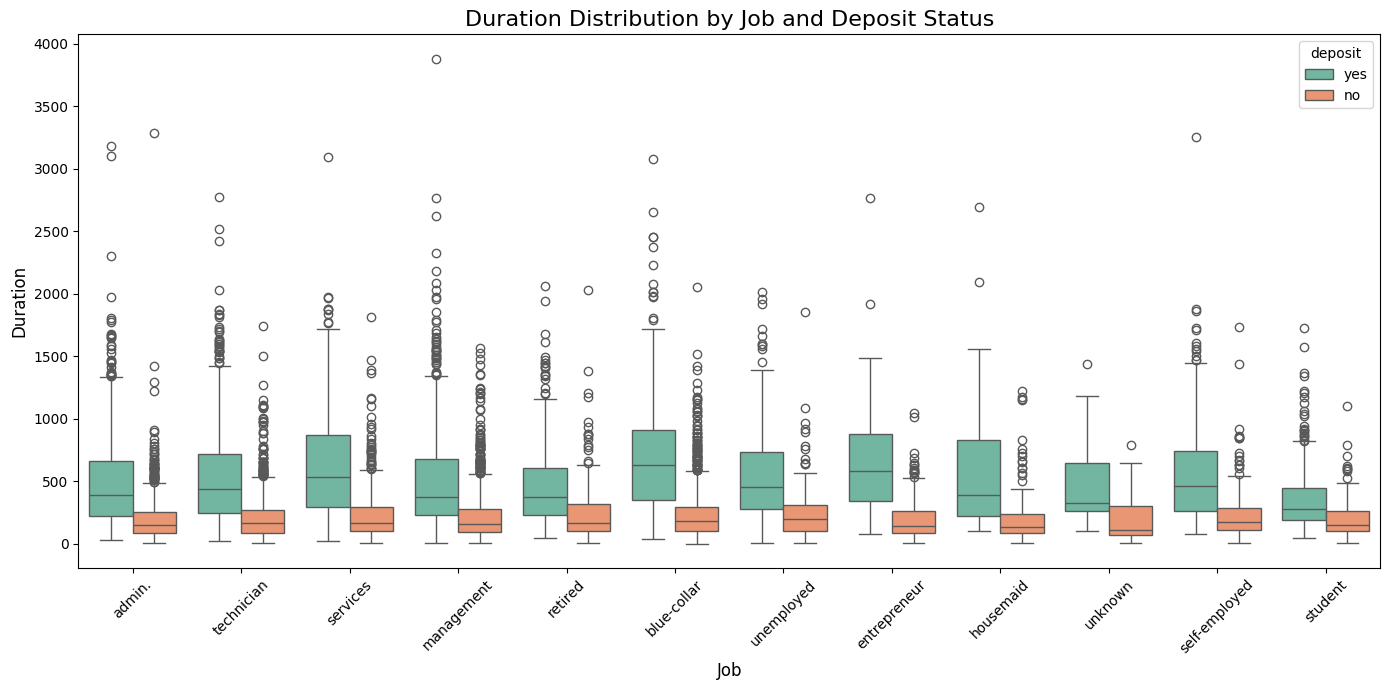

In [ ]:
## Duration vs Job
# Chia dữ liệu theo giá trị cột deposit (yes, no) và job
plt.figure(figsize=(14, 7))
sns.boxplot(x='job', y='duration', hue='deposit', data=df, palette="Set2")

# Thêm tiêu đề và các nhãn
plt.title('Duration Distribution by Job and Deposit Status', fontsize=16)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Nhìn chung, thời gian cuộc gọi lần liên hệ cuối cùng càng lâu thì tỷ lệ khách hàng say yes càng cao, nói cách khác là những khách hàng tiềm năng sẽ có thời lượng cuộc gọi lâu hơn
+ So sánh mức trung bình thì, nhóm khách hàng là  blue-collar( chân tay) và entreoreneur( doanh nhân) có thời lượng cuộc gọi trung bình cao hơn nhóm khác , thấp nhất là student và retired
+Những khách hàng tiềm năng chưa đặt cọc có thời lượng cuộc gọi ít hơn.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\223437263.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




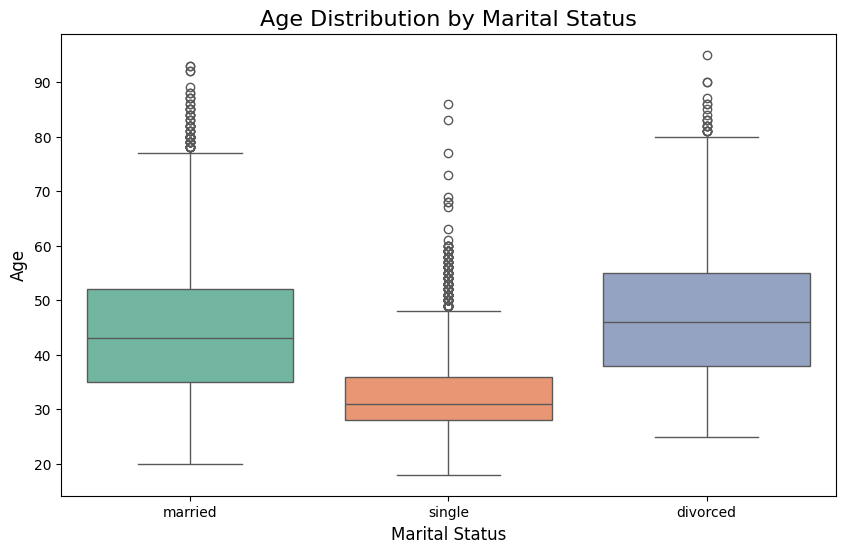

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ boxplot của age theo marital
sns.boxplot(data=df, x="marital", y="age", palette="Set2")

# Thêm tiêu đề và nhãn
plt.title('Age Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Hiển thị biểu đồ
plt.show()


Độ tuổi trung bình của những người đã kết hôn là 43 và đối với những người đã ly hôn là 46.
Độ tuổi trung bình của những người độc thân là 31

#### Campaign

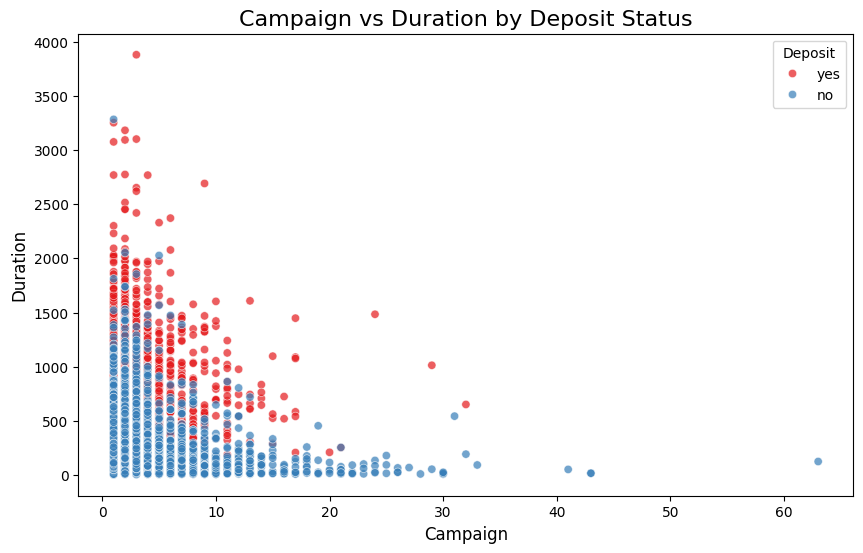

In [74]:
### Campaign vs Duration Call

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ scatter plot
sns.scatterplot(data=df, x="campaign", y="duration", hue="deposit", palette="Set1", alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title('Campaign vs Duration by Deposit Status', fontsize=16)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.legend(title="Deposit", loc="upper right")

# Hiển thị biểu đồ
plt.show()


In [32]:
df1 = df[df['duration'] > 2000]
df1['duration'].value_counts().sort_index()

duration
2015    1
2016    2
2027    1
2028    1
2029    1
2053    1
2062    1
2078    1
2087    1
2093    1
2184    1
2231    1
2301    1
2330    1
2372    1
2420    1
2453    1
2456    1
2516    1
2621    1
2653    1
2692    1
2769    1
2770    1
2775    1
3076    1
3094    1
3102    1
3183    1
3253    1
3284    1
3881    1
Name: count, dtype: int64

+ Số lần gọi khách hàng trong chiến dịch càng nhiều thì thời gian của các cuộc gọi đó càng giảm đi
+ Thời gian gọi khách hàng càng cao thì càng dễ mời được khách hnagf đồng ý đăng kí 
+ Khi nào số cuộc gọi lên tới tầm 18 cuộc thì khả năng thành công rất rất ít
+ Có nhiều khách hàng tiềm năng tích cực trong những ngày đầu của chiến dịch

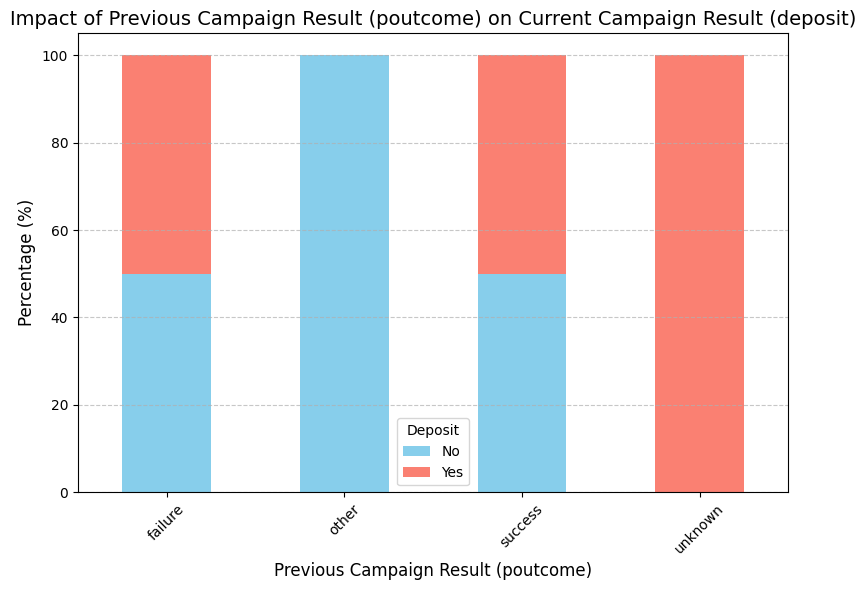

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử đây là dữ liệu của bạn
data = {
    'poutcome': ['success', 'failure', 'unknown', 'other', 'success', 'failure', 'unknown'],
    'deposit': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes']
}
df = pd.DataFrame(data)

# Bước 1: Tính tỷ lệ
pivot = df.groupby(['poutcome', 'deposit']).size().unstack(fill_value=0)
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Bước 2: Vẽ biểu đồ
pivot_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])

# Thêm thông tin vào biểu đồ
plt.title('Impact of Previous Campaign Result (poutcome) on Current Campaign Result (deposit)', fontsize=14)
plt.xlabel('Previous Campaign Result (poutcome)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Deposit', labels=['No', 'Yes'], fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


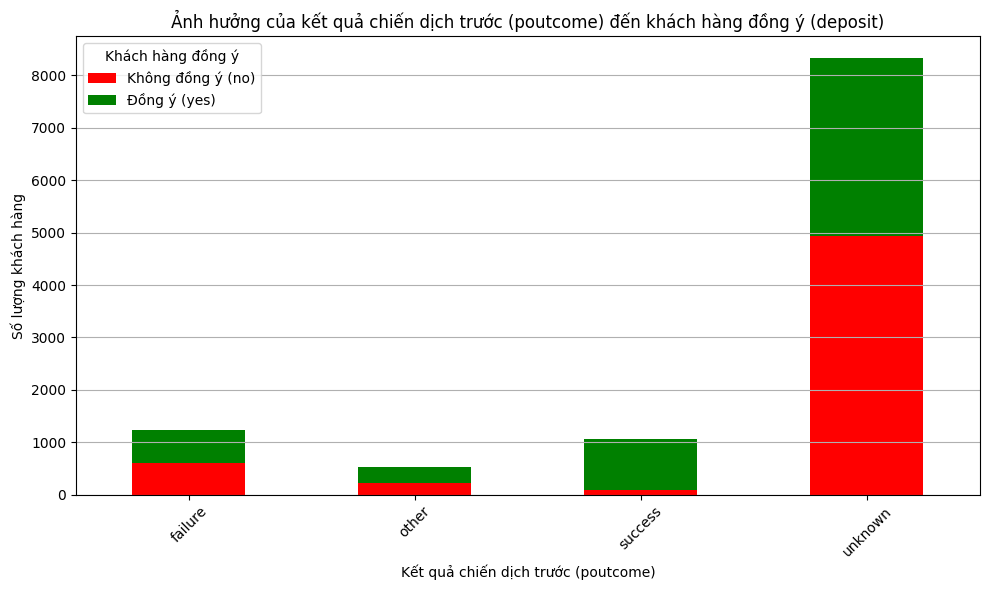

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
data = pd.read_csv('bank.csv')

# Tính toán số lượng khách hàng đồng ý và không đồng ý theo poutcome
summary = data.groupby(['poutcome', 'deposit']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột chồng
summary.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Thêm tiêu đề và nhãn
plt.title('Ảnh hưởng của kết quả chiến dịch trước (poutcome) đến khách hàng đồng ý (deposit)')
plt.xlabel('Kết quả chiến dịch trước (poutcome)')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.legend(title='Khách hàng đồng ý', labels=['Không đồng ý (no)', 'Đồng ý (yes)'])
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<BarContainer object of 11162 artists>

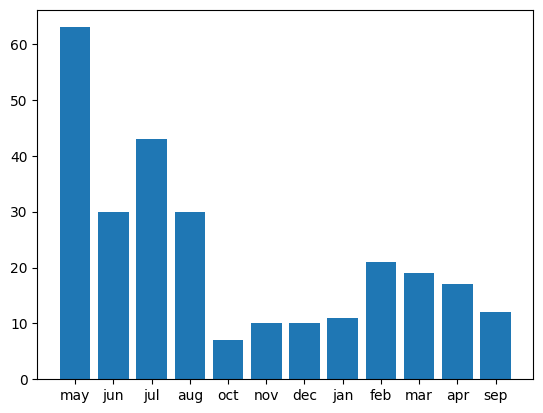

In [75]:
## Campaign vs Month
plt.bar(df['month'], df['campaign'])


+ Chúng ta có thể thấy chiến dịch chủ yếu tập trung vào thời điểm bắt đầu kỳ ngân hàng (tháng 5, tháng 6 và tháng 7)
+ Thông thường, thời gian học tập bắt đầu vào thời điểm đó nên có khả năng cha mẹ sẽ gửi tiền dưới tên con mình
+ Họ cũng đã thực hiện chiến dịch của mình vào cuối kỳ ngân hàng.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\3713557535.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




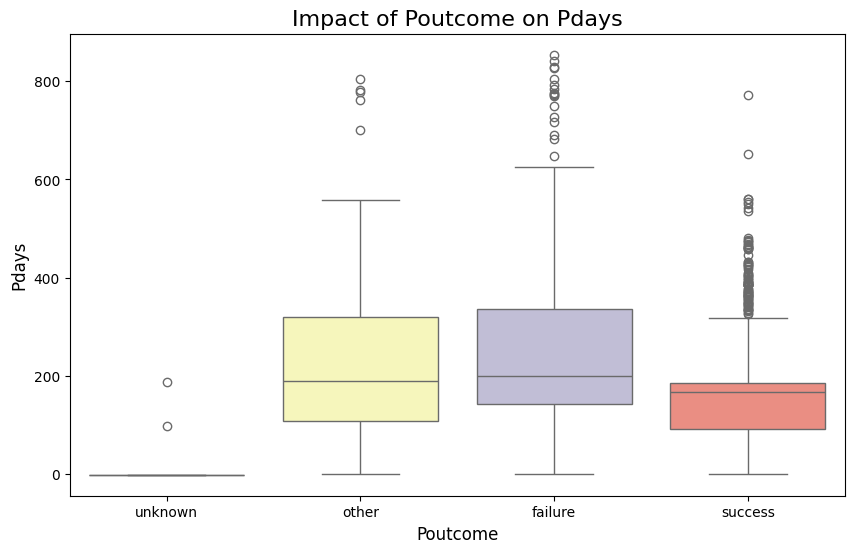

In [76]:
plt.figure(figsize=(10, 6))

# Vẽ boxplot của pdays theo poutcome
sns.boxplot(data=df, x="poutcome", y="pdays", palette="Set3")

# Thêm tiêu đề và nhãn
plt.title('Impact of Poutcome on Pdays', fontsize=16)
plt.xlabel('Poutcome', fontsize=12)
plt.ylabel('Pdays', fontsize=12)

# Hiển thị biểu đồ
plt.show()


+ Có thể thấy kết quả của chiến dịch trước đó càng về cuối thì thu hút được nhiều khách hàng đăng kí hơn là trước
+ Số ngày trung bình trôi qua sau khi liên hệ với khách hàng để biết kết quả chiến dịch trước đó không thành công là 200 ngày.
+ Số ngày trung bình trôi qua sau khi liên hệ với khách hàng để biết kết quả chiến dịch trước đó thành công là 168 ngày

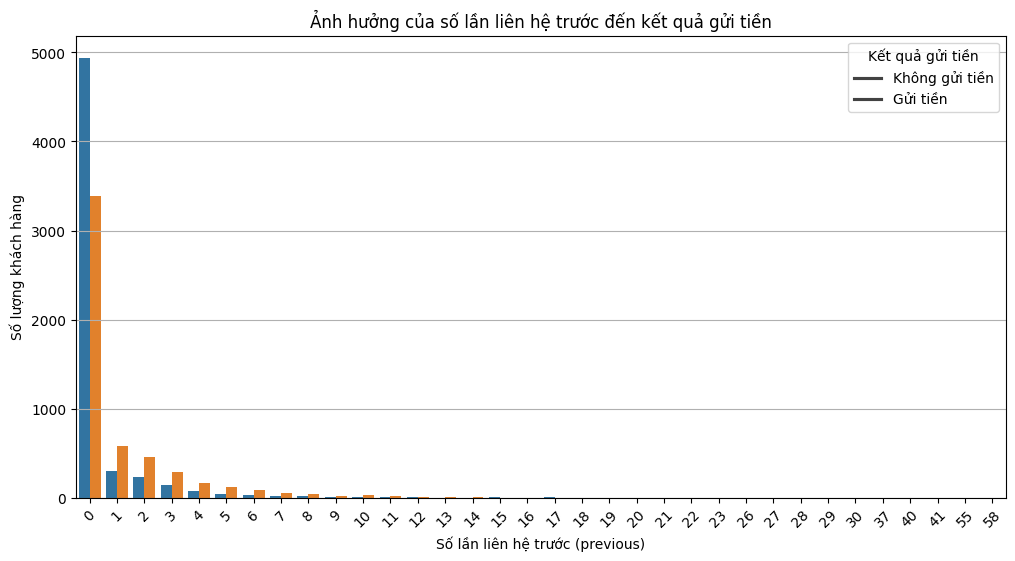

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('bank.csv')  # Thay 'bank.csv' bằng đường dẫn đến file của bạn

# Tạo một DataFrame mới với số lượng deposit cho mỗi giá trị của previous
summary_df = df.groupby(['previous', 'deposit']).size().reset_index(name='count')

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='previous', y='count', hue='deposit', data=summary_df)
plt.title('Ảnh hưởng của số lần liên hệ trước đến kết quả gửi tiền')
plt.xlabel('Số lần liên hệ trước (previous)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Kết quả gửi tiền', loc='upper right', labels=['Không gửi tiền', 'Gửi tiền'])
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.grid(axis='y')
plt.show()

In [41]:
df['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [43]:
df.shape

(11162, 17)